## 🌻**Destyasti Sri Puspito Widi_24/554312/NPA/19974**🌻

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense
import joblib

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Akses Folder Dataset di Google Drive

In [ ]:
# path dataset
dataset_path = "/content/drive/MyDrive/PengenalanPola_desty/UCI HAR Dataset"

# check apakah folder dataset ada
if os.path.exists(dataset_path):
    print("✅ Dataset ditemukan!")
else:
    print("❌ Dataset tidak ditemukan. Pastikan path benar.")

✅ Dataset ditemukan!


Load Dataset ke Pandas DataFrame

In [ ]:
# Pastikan path sesuai lokasi dataset di Google Drive
dataset_path = "/content/drive/MyDrive/PengenalanPola_desty/UCI HAR Dataset"

def load_data(prefix):
    """Memuat data dari folder train/test dengan validasi file"""

    # Path untuk features.txt
    features_path = f"{dataset_path}/features.txt"

    # Periksa apakah features.txt ada
    if not os.path.exists(features_path):
        raise FileNotFoundError(f"❌ File {features_path} tidak ditemukan!")

    # Memuat fitur dari features.txt
    features = pd.read_csv(features_path, sep='\s+', header=None)[1].values

    # Mengatasi fitur yang duplikat
    unique_features = []
    feature_counts = {}
    for feature in features:
        if feature in feature_counts:
            feature_counts[feature] += 1
            unique_features.append(f"{feature}_{feature_counts[feature]}")
        else:
            feature_counts[feature] = 1
            unique_features.append(feature)

    # Path untuk data X dan y
    X_path = f"{dataset_path}/{prefix}/X_{prefix}.txt"
    y_path = f"{dataset_path}/{prefix}/y_{prefix}.txt"

    # Periksa apakah file X dan y ada sebelum membaca
    if not os.path.exists(X_path):
        raise FileNotFoundError(f"❌ File {X_path} tidak ditemukan!")
    if not os.path.exists(y_path):
        raise FileNotFoundError(f"❌ File {y_path} tidak ditemukan!")

    # Memuat data X (fitur) dan y (label)
    X = pd.read_csv(X_path, sep='\s+', header=None, names=unique_features)
    y = pd.read_csv(y_path, sep='\s+', header=None, names=['Activity'])

    return X, y, unique_features

# load data train dan test
try:
    X_train, y_train, feature_names = load_data("train")
    X_test, y_test, _ = load_data("test")  # Tidak perlu feature_names lagi
    print("✅ Data berhasil dimuat!")
except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f"❌ Terjadi error: {e}")
print("========================================================")
# Cek bentuk data
print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data: {X_test.shape}, Labels: {y_test.shape}")
print("========================================================")

✅ Data berhasil dimuat!
Training Data: (7352, 561), Labels: (7352, 1)
Testing Data: (2947, 561), Labels: (2947, 1)


Preprocessing: Normalisasi & Encoding Label

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encoding label aktivitas (1-6 → 0-5)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train.values.ravel())
y_test = encoder.transform(y_test.values.ravel())

print("✅ Data siap untuk training!")

✅ Data siap untuk training!


Training Model menggunakan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9260
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       496
           1       0.89      0.90      0.90       471
           2       0.97      0.86      0.91       420
           3       0.91      0.89      0.90       491
           4       0.90      0.92      0.91       532
           5       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



Training Menggunakan Model Deep Learning dengan CNN

In [ ]:
# Pastikan X_train dan X_test dalam bentuk NumPy array
X_train_np = np.array(X_train)  # Jika masih dalam bentuk DataFrame
X_test_np = np.array(X_test)

# Bentuk ulang untuk CNN (tambahkan dimensi ke-3)
X_train_cnn = X_train_np.reshape(X_train_np.shape[0], X_train_np.shape[1], 1)
X_test_cnn = X_test_np.reshape(X_test_np.shape[0], X_test_np.shape[1], 1)


# Model CNN
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')  # 6 Kelas aktivitas
])


# Compile & Train
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluasi
loss, acc = model_cnn.evaluate(X_test_cnn, y_test)
print(f"✅ CNN Accuracy: {acc:.4f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.8205 - loss: 0.4478 - val_accuracy: 0.9403 - val_loss: 0.1499
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.9753 - loss: 0.0690 - val_accuracy: 0.9542 - val_loss: 0.1306
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9813 - loss: 0.0484 - val_accuracy: 0.9352 - val_loss: 0.2162
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9886 - loss: 0.0333 - val_accuracy: 0.9515 - val_loss: 0.1532
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9904 - loss: 0.0255 - val_accuracy: 0.9542 - val_loss: 0.1749
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9933 - loss: 0.0168 - val_accuracy: 0.9600 - val_loss: 0.1548
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9937 - loss: 0.0157 - val_accuracy: 0.9545 - val_loss: 0.1717
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9965 - loss: 0.0111 - val_accurac

Simpan Model

In [ ]:
# Simpan model Random Forest
joblib.dump(model, "/content/drive/MyDrive/model_rf.pkl")

# Simpan model CNN
model_cnn.save("/content/drive/MyDrive/model_cnn.h5")

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
model_cnn = tf.keras.models.load_model("/content/drive/MyDrive/model_cnn.h5")
model_rf = joblib.load("/content/drive/MyDrive/model_rf.pkl")

Confusion Matrix dari Testing Menggunkan CNN

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


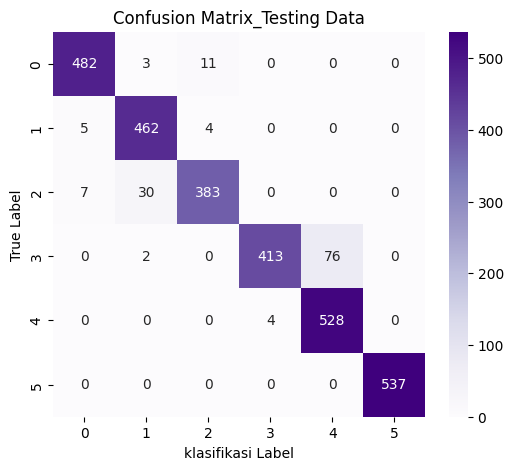

In [ ]:
# klasifikasi class
y_pred_prob = model_cnn.predict(X_test_cnn) # klasifikasi probabilitas
y_pred = np.argmax(y_pred_prob, axis=1)  # Konversi ke label class

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("klasifikasi Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix_Testing Data")
plt.show()

## 🔎**INPUT DAN OUTPUT_PROGRAM HAR SINYAL 1 DIMENSI**🔎

Membuat sinyal acak untuk pengujian/ Input Program

Copy random sinyal ini dan Inputkan sinyal:
0.0869397399627263,-0.005692368234256673,-0.7304284301651238,-0.007849042998937739,-0.661792199158697,-0.7477284274084697,0.8652914346823355,0.2099000262954085,0.31898011624916855,-0.19641265933327245,0.8179617838297284,0.27586097915933094,0.5383397390471749,-0.26287506194457233,0.920023761638251,0.6409225803166301,0.7078969260290873,-0.6556114651484914,-0.45807358425756095,-0.42874680063284587,-0.45818155350625767,0.7108163242085759,-0.9362304095828158,-0.8478000220384514,-0.45217025874019257,-0.6002540507011127,-0.5362807722343033,0.5958863785066,0.12625318778409378,-0.988458677414064,-0.1413544685916095,-0.18423014629928214,-0.7721094611109129,0.35228357720291426,0.4041943767589822,0.4417864381041954,0.4569418911171841,-0.9998943461354064,0.9078416076934444,0.6284175341093261,0.8079633931785706,-0.9687134093851317,0.8677175915714788,0.6195770573762094,0.6744382859173972,-0.813425230556063,0.47755605783719535,0.919833379284182,0.35709468283

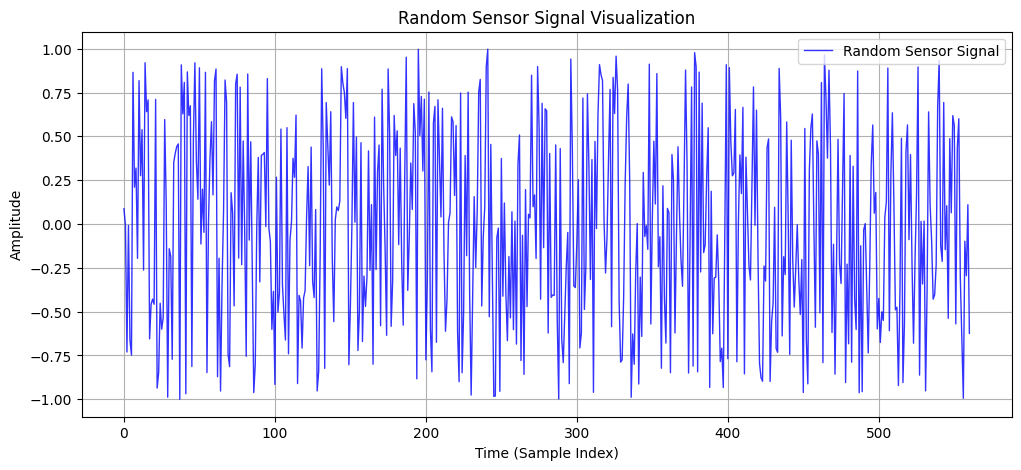

In [ ]:
# Buat sinyal acak dengan 561 angka (mirip data dari sensor)
random_signal = np.random.uniform(-1, 1, 561)  # Angka acak antara -1 dan 1

# Konversi ke format string agar bisa digunakan sebagai input
random_signal_str = ",".join(map(str, random_signal))

# Tampilkan sinyal lengkap
print("Copy random sinyal ini dan Inputkan sinyal:")
print(random_signal_str)
print("=======================================================================================================")

# Visualisasi sinyal menggunakan Matplotlib
plt.figure(figsize=(12, 5))
plt.plot(random_signal, linestyle='-', color='b', linewidth=1, alpha=0.8, label="Random Sensor Signal")
plt.xlabel("Time (Sample Index)")
plt.ylabel("Amplitude")
plt.title("Random Sensor Signal Visualization")
plt.legend()
plt.grid(True)
plt.show()

Inputkan sinyal dengan format angka yang dipisahkan koma (,)
Inputkan Sinyal: 0.048872691715498684,0.612193495921495,-0.2930450497432424,0.2844192740053948,-0.508736851902371,-0.7814411092636802,0.5887684501857127,-0.8020627531825864,-0.4572372098408308,0.7102188439948802,-0.3070614258426656,0.9460906990283222,0.9594686695477195,-0.4634479590928866,-0.9180435555002191,0.41012656841075823,-0.09802699470331255,-0.7984943120808474,0.4150456379560856,-0.9376501817761576,0.7403933809844843,-0.7226949417733926,-0.74537624250655,-0.648655404062831,0.9205327169841331,0.386338720507692,0.6027430709272734,-0.20473002853449396,-0.3273745449900889,-0.5310319864336601,-0.038703943375182126,0.103657467068337,0.26354968730551076,-0.48576299200261097,0.8973081618059813,-0.6604830035857283,0.9313063495328247,-0.9702877549849924,-0.037748616366308774,-0.3332643237668744,-0.10175317213949842,0.14132915796157808,-0.12882168397458194,-0.17030629939681008,0.4654468308266131,0.3717525501729293,0.666542564071

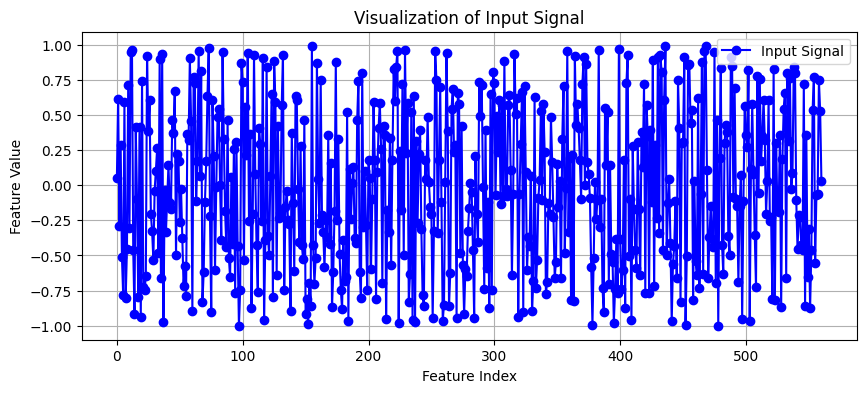

✅ Klasifikasi Aktivitas: Walking Upstairs (Naik Tangga)


In [ ]:
def predict_activity(input_signal, model, scaler, encoder, feature_names):
    """
    Mengklasifikasi aktivitas berdasarkan input sinyal.

    Parameters:
    - input_signal: list atau array (satu sampel data dengan panjang sesuai jumlah fitur)
    - model: model Machine Learning yang telah dilatih
    - scaler: StandardScaler yang telah dilatih dengan data training
    - encoder: LabelEncoder untuk mengonversi hasil Klasifikasi menjadi label aktivitas
    - feature_names: Nama fitur agar sesuai dengan data training

    Returns:
    - Klasifikasi aktivitas sebagai teks
    """
    # Pastikan input dalam bentuk DataFrame agar sesuai dengan scaler
    input_df = pd.DataFrame([input_signal], columns=feature_names)

    # Lakukan scaling menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df)

    # Lakukan Klasifikasi dengan model
    klasifikasi_class = model.predict(input_scaled)

    # Konversi hasil Klasifikasi ke label aktivitas
    klasifikasi_label = encoder.inverse_transform([klasifikasi_class[0]])[0]

    # Pemetaan label angka ke aktivitas
    activity_labels = {
        1: "Walking (Berjalan)",
        2: "Walking Upstairs (Naik Tangga)",
        3: "Walking Downstairs (Turun Tangga)",
        4: "Sitting (Duduk)",
        5: "Standing (Berdiri)",
        6: "Laying (Berbaring)"
    }

    activity_name = activity_labels.get(klasifikasi_label, "Unknown Activity")

    return activity_name

# Menampilkan menu untuk memasukkan data secara manual
print("Inputkan sinyal dengan format angka yang dipisahkan koma (,)")

# Input dari pengguna
input_str = input("Inputkan Sinyal: ")
print("======================================================================================================")
# Konversi input string ke array float
try:
    input_signal = np.array([float(x) for x in input_str.split(",")])

    # Pastikan jumlah fitur sesuai
    if len(input_signal) != len(feature_names):
        print(f"❌ Jumlah fitur tidak sesuai! Harus {len(feature_names)} angka.")
    else:
        # Plot sinyal input
        plt.figure(figsize=(10, 4))
        plt.plot(input_signal, marker='o', linestyle='-', color='b', label="Input Signal")
        plt.xlabel("Feature Index")
        plt.ylabel("Feature Value")
        plt.title("Visualization of Input Signal")
        plt.legend()
        plt.grid(True)
        plt.show()
        # klasifikasi aktivitas dari input sinyal
        klasifikasi_activity = predict_activity(input_signal, model, scaler, encoder, feature_names)
        print("======================================================================================================")
        print(f"✅ Klasifikasi Aktivitas: {klasifikasi_activity}")
except ValueError:
    print("❌ Format input tidak valid! Masukkan angka yang dipisahkan koma (,)")
